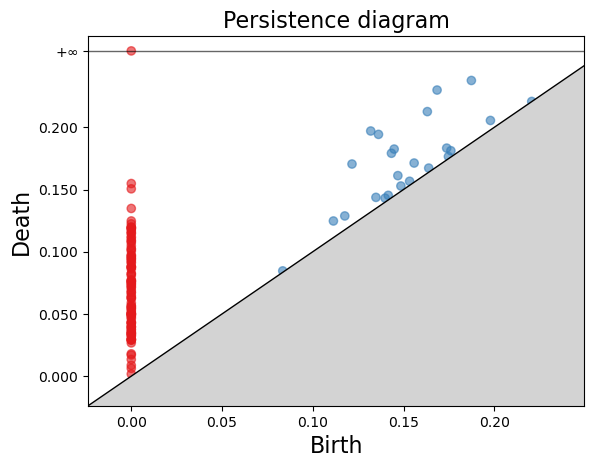

In [33]:
import numpy as np
import gudhi as gd
from ripser import Rips

np.random.seed(0)
data = np.random.rand(100, 2)

rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


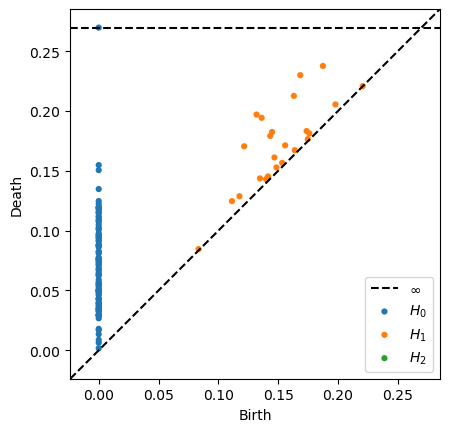

In [34]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(data, distance_matrix = False)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
rips.plot(dgms, legend=True, show=False)


In [35]:
# print([i for i in persistence if i[0] == 1])
for idx, (dim,(b, d)) in enumerate([i for i in persistence if i[0] == 1]):
    print(idx, dim, b, d)

0 1 0.13192247329732176 0.19702435516244868
1 1 0.16847292207011788 0.2299394152543309
2 1 0.1361946520922958 0.19430932572721465
3 1 0.18737364340969206 0.23762589571474388
4 1 0.16311420508962493 0.2126152063778792
5 1 0.1216011320078685 0.17048551014761384
6 1 0.1448370848473619 0.18250065289699496
7 1 0.14333727568215562 0.17913082454073845
8 1 0.1558367957524027 0.1712780285565818
9 1 0.14687120508714382 0.16116437401698902
10 1 0.11135716438759752 0.12470811494092816
11 1 0.11762639203721542 0.12875564587920366
12 1 0.17377309908660268 0.1832697770798435
13 1 0.1347925394690401 0.1436871671846676
14 1 0.19787555762705436 0.2054942265977528
15 1 0.17607548142714238 0.18117337539995076
16 1 0.1485445016951719 0.1528215624827076
17 1 0.14157103849407057 0.14532293016648712
18 1 0.16387443322709166 0.1672185891076738
19 1 0.15333739547987224 0.15662139275338813
20 1 0.1398474090136695 0.14306129268590195
21 1 0.17472748350563658 0.1765112499520425
22 1 0.08344932112406117 0.084592852

In [36]:
pairs = simplex_tree.persistence_pairs()

In [37]:
filtration = simplex_tree.get_filtration()
# for simplex, filtration_value in filtration:
#     print(simplex, filtration_value)

In [39]:
count = 0
for birth_value, death_value in [i[1] for i in persistence if i[0] == 1]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-3
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    involved_points = set()

    for birth_simplex in birth_simplices:
        for death_simplex in death_simplices:
            if set(birth_simplex).issubset(death_simplex):
                involved_points.update(birth_simplex)
                involved_points.update(death_simplex)

    if len(involved_points) >= 0 : print(count, birth_value, death_value, involved_points) 
    count += 1
    
        

0 0.13192247329732176 0.19702435516244868 {93, 69, 14}
1 0.16847292207011788 0.2299394152543309 {64, 97, 65, 67, 5, 42, 14, 80, 53, 58, 92}
2 0.1361946520922958 0.19430932572721465 {56, 65, 91}
3 0.18737364340969206 0.23762589571474388 {98, 67, 99, 7, 78, 47, 80, 17, 52, 86}
4 0.16311420508962493 0.2126152063778792 {69, 14, 47, 79, 50, 20, 86, 24}
5 0.1216011320078685 0.17048551014761384 {80, 69, 5}
6 0.1448370848473619 0.18250065289699496 {12, 77, 46, 15, 52, 54, 90}
7 0.14333727568215562 0.17913082454073845 {97, 69, 94}
8 0.1558367957524027 0.1712780285565818 {65, 42, 14}
9 0.14687120508714382 0.16116437401698902 {8, 41, 46}
10 0.11135716438759752 0.12470811494092816 {1, 69, 50, 84, 87, 25}
11 0.11762639203721542 0.12875564587920366 {33, 37, 84, 21, 87, 89, 31}
12 0.17377309908660268 0.1832697770798435 {15, 16, 47, 18, 54, 88, 25, 24, 95}
13 0.1347925394690401 0.1436871671846676 {3, 6, 72, 44, 78, 55, 58, 59, 92}
14 0.19787555762705436 0.2054942265977528 {97, 9, 43, 28, 82, 21, 56, 5

In [48]:
concern_points = {98, 67, 99, 7, 78, 47, 80, 17, 52, 86}
list(concern_points)

[98, 99, 67, 7, 78, 47, 80, 17, 52, 86]

In [49]:
deleted_data = np.delete(data, list(concern_points), axis=0)

In [50]:
print(data.shape, deleted_data.shape)

(100, 2) (90, 2)


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


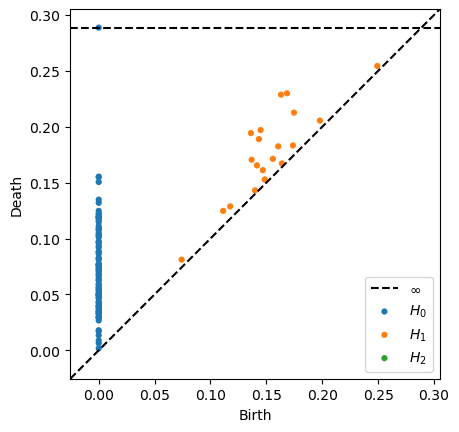

In [51]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(deleted_data, distance_matrix = False)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
rips.plot(dgms, legend=True, show=False)
